In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from datetime import datetime, timedelta


In [2]:
# start date used to make output.csv
start_date_string = "2018-03-01 00:00:00"
start_date = datetime.strptime(start_date_string, "%Y-%m-%d %H:%M:%S")

timeStep = 4 #hours

numberOfRuns = 552 # Number of times the timestep was computed

timesInRange = [start_date+timedelta(hours=(timeStep*numberOfRuns)) for i in range(numberOfRuns)]

#print(timesInRange)

In [3]:
outputDf = (pd.read_csv("output.csv"))
inputDf = (pd.read_csv("data/20210204.matilija.dhsvm.discharge.flux.csv"))
           
header_list = ["col","row","segment","length.m", "bank.height.m","channel.width.m"]
mapDf = (pd.read_csv("data/stream.map.csv", "\t", names=header_list))
           



In [4]:
mapDf.head()

,col,row,segment,length.m,bank.height.m,channel.width.m
0,382,124,139,38.74103,0.01551,0.3
1,383,125,139,38.74103,0.01551,0.3
2,384,126,139,27.39491,0.01579,0.3
3,385,126,139,38.74103,0.01521,0.3
4,386,127,139,27.39491,0.01511,0.3


In [5]:
outputDf.head()

,segmentId,time,dimensionlessDischarge,overThreshold,threshold
0,1,1.0,0.000000,0,450.162586
1,2,1.0,0.000000,0,51.160831
2,3,1.0,0.000000,0,381.152321
3,4,1.0,0.204557,0,52.225016
4,5,1.0,0.468391,0,52.258619


In [6]:
inputDf.head()



,segment,class,datetime,timestep.s,outflow.m3pts,hyd.width.m,hyd.depth.m,outflow.flux.mpts,outflow.flux.mps
0,1,14,2017-12-01T00:00:00Z,3600,0.0,0.3,1.0,0.0,0.0
1,1,14,2017-12-01T01:00:00Z,3600,0.0,0.3,1.0,0.0,0.0
2,1,14,2017-12-01T02:00:00Z,3600,0.0,0.3,1.0,0.0,0.0
3,1,14,2017-12-01T03:00:00Z,3600,0.0,0.3,1.0,0.0,0.0
4,1,14,2017-12-01T04:00:00Z,3600,0.0,0.3,1.0,0.0,0.0


In [7]:
segments = outputDf['segmentId'].unique()

dimensionlessDischargeSum = {}
outFlowSum = {}
maxSumDD = 0
maxSumFlow = 0
for segment in segments:
    dimensionlessDischargeSum[segment] = sum(outputDf.loc[outputDf['segmentId'] == segment]['dimensionlessDischarge'])
    outFlowSum[segment] = sum(inputDf.loc[inputDf['segment'] == segment]['outflow.m3pts'])
    if dimensionlessDischargeSum[segment] > maxSumDD:
        maxSumDD = dimensionlessDischargeSum[segment]
    if outFlowSum[segment] > maxSumFlow:
        maxSumFlow = outFlowSum[segment]
for segment in segments:
    dimensionlessDischargeSum[segment] = dimensionlessDischargeSum[segment]/maxSumDD
    outFlowSum[segment] = outFlowSum[segment]/maxSumFlow

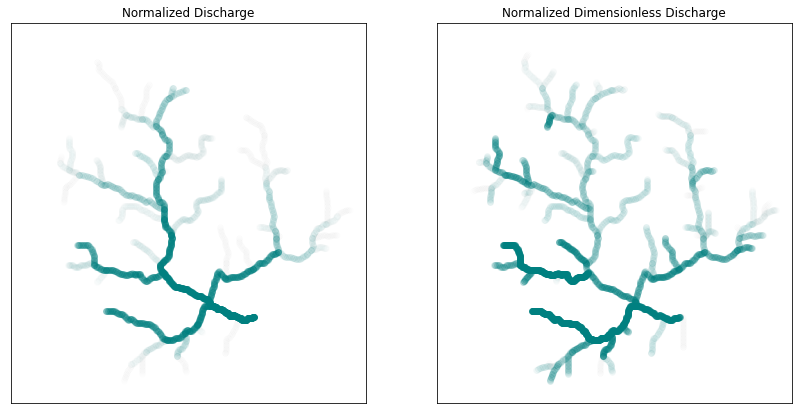

In [8]:
f, (ax1, ax2) = plt.subplots(1, 2)


for segment in segments: 
    cols =  list(mapDf.loc[mapDf['segment'] == segment]['col'])
    rows =  list(mapDf.loc[mapDf['segment'] == segment]['row'])
    
    ax2.scatter(cols,rows, color = 'teal', alpha=dimensionlessDischargeSum[segment])
    ax2.set_title('Normalized Dimensionless Discharge')
    ax1.scatter(cols,rows, color = 'teal', alpha=outFlowSum[segment])
    ax1.set_title('Normalized Discharge')
    ax1.set_xticks([])
    ax1.set_yticks([])
    ax2.set_xticks([])
    ax2.set_yticks([])

f.set_figheight(7)
f.set_figwidth(14)

plt.show()
        


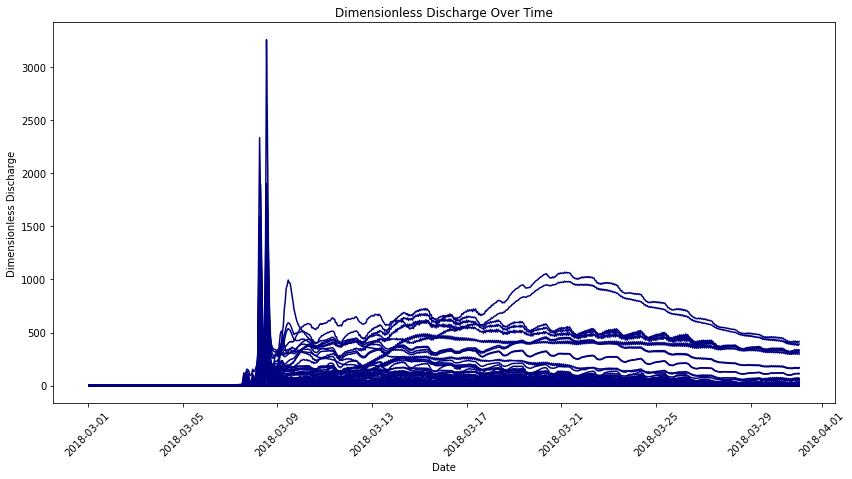

In [9]:
f, ax = plt.subplots(1, 1)

segments = outputDf['segmentId'].unique()
for segment in segments:
    dimensionlessDischargeValues = list(outputDf.loc[outputDf['segmentId'] == segment]['dimensionlessDischarge'])
    dimensionlessDischargeTimeStep = [start_date+timedelta(hours=((time/1)*1))for time in list(outputDf.loc[outputDf['segmentId'] == segment]['time'])]
    ax.plot(dimensionlessDischargeTimeStep, dimensionlessDischargeValues, color="navy")
    plt.xticks(rotation=45)
ax.set_title('Dimensionless Discharge Over Time')
ax.set_ylabel('Dimensionless Discharge')
ax.set_xlabel('Date')
f.set_figheight(7)
f.set_figwidth(14)
plt.show()

In [10]:
# threshold graph (current values not based on real data)

# make list of 1 or 0 if threshold was reached in at any point
thresholdValues = {}
totalOverThreshold = 0
totalSegments = 0
for segment in segments:
    #print(list(outputDf.loc[outputDf['segmentId'] == segment]['overThreshold']))
    if 1.0 in list(outputDf.loc[outputDf['segmentId'] == segment]['overThreshold']):
        thresholdValues[segment] = .5
        totalOverThreshold += 1 
    else:
        thresholdValues[segment] = .03
    totalSegments += 1


In [11]:
print(totalOverThreshold)
print(totalSegments)
print("Percent over threshold: ", (totalOverThreshold/totalSegments)*100)

114
138
Percent over threshold:  82.6086956521739


In [12]:
print(thresholdValues)

{1: 0.03, 2: 0.03, 3: 0.03, 4: 0.5, 5: 0.5, 6: 0.5, 7: 0.03, 8: 0.03, 9: 0.5, 10: 0.03, 11: 0.03, 12: 0.5, 13: 0.5, 14: 0.03, 15: 0.5, 16: 0.5, 17: 0.5, 18: 0.5, 19: 0.5, 20: 0.03, 21: 0.5, 22: 0.5, 23: 0.03, 24: 0.5, 25: 0.5, 26: 0.5, 27: 0.5, 28: 0.5, 29: 0.03, 30: 0.5, 31: 0.5, 32: 0.5, 33: 0.5, 34: 0.5, 35: 0.5, 36: 0.5, 37: 0.5, 38: 0.5, 39: 0.5, 40: 0.5, 41: 0.5, 42: 0.5, 43: 0.5, 44: 0.5, 45: 0.5, 46: 0.5, 47: 0.5, 48: 0.5, 49: 0.5, 50: 0.5, 51: 0.03, 52: 0.5, 53: 0.03, 54: 0.03, 55: 0.5, 56: 0.5, 57: 0.5, 58: 0.5, 59: 0.5, 60: 0.03, 61: 0.03, 62: 0.5, 63: 0.03, 64: 0.5, 65: 0.5, 66: 0.03, 67: 0.5, 68: 0.03, 69: 0.5, 70: 0.03, 71: 0.5, 72: 0.03, 73: 0.5, 74: 0.5, 75: 0.5, 76: 0.5, 77: 0.5, 78: 0.5, 79: 0.5, 80: 0.03, 81: 0.03, 82: 0.5, 83: 0.03, 84: 0.5, 85: 0.5, 86: 0.5, 87: 0.5, 88: 0.5, 89: 0.5, 90: 0.5, 91: 0.5, 92: 0.5, 93: 0.5, 94: 0.5, 95: 0.5, 96: 0.5, 97: 0.5, 98: 0.5, 99: 0.5, 100: 0.5, 101: 0.5, 102: 0.5, 103: 0.5, 104: 0.5, 105: 0.5, 106: 0.5, 107: 0.5, 108: 0.5, 109

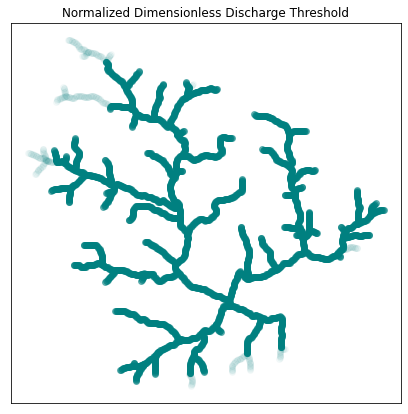

In [13]:
f, ax3 = plt.subplots(1, 1)


for segment in segments: 
    cols =  list(mapDf.loc[mapDf['segment'] == segment]['col'])
    rows =  list(mapDf.loc[mapDf['segment'] == segment]['row'])
    ax3.scatter(cols,rows, color = 'teal', alpha=thresholdValues[segment])
    ax3.set_title('Normalized Dimensionless Discharge Threshold')
    ax3.set_xticks([])
    ax3.set_yticks([])


f.set_figheight(7)
f.set_figwidth(7)

plt.show()

# Variability Testing

In [14]:
def segmentPlot(df):
    f, ax = plt.subplots(1, 1)
    segments = df['segmentId'].unique()
    for segment in segments:
        dimensionlessDischargeValues = list(df.loc[df['segmentId'] == segment]['dimensionlessDischarge'])
        dimensionlessDischargeTimeStep = [start_date+timedelta(hours=((time/1)*1))for time in list(df.loc[df['segmentId'] == segment]['time'])]
        ax.plot(dimensionlessDischargeTimeStep, dimensionlessDischargeValues, color="navy")
        plt.xticks(rotation=45)
    ax.set_title('Dimensionless Discharge Over Time')
    ax.set_ylabel('Dimensionless Discharge')
    ax.set_xlabel('Date')
    f.set_figheight(7)
    f.set_figwidth(14)
    plt.show()
    
def thresholdPlot(df):

    thresholdValues = {}
    totalOverThreshold = 0
    totalSegments = 0
    for segment in segments:
        #print(list(outputDf.loc[outputDf['segmentId'] == segment]['overThreshold']))
        if 1.0 in list(df.loc[df['segmentId'] == segment]['overThreshold']):
            thresholdValues[segment] = .5
            totalOverThreshold += 1 
        else:
            thresholdValues[segment] = .03
        totalSegments += 1
    print("Percent over threshold: ", (totalOverThreshold/totalSegments)*100)
    f, ax3 = plt.subplots(1, 1)


    for segment in segments: 
        cols =  list(mapDf.loc[mapDf['segment'] == segment]['col'])
        rows =  list(mapDf.loc[mapDf['segment'] == segment]['row'])
        ax3.scatter(cols,rows, color = 'teal', alpha=thresholdValues[segment])
        ax3.set_title('Normalized Dimensionless Discharge Threshold')
        ax3.set_xticks([])
        ax3.set_yticks([])


    f.set_figheight(7)
    f.set_figwidth(7)

    plt.show()


def makeDimensionlessDischargeGraphs(fileName):
    outputDfFunc = (pd.read_csv(fileName))
    print(outputDfFunc.head())
    segmentPlot(outputDfFunc)
    thresholdPlot(outputDfFunc)

def dischargeSegmentPlot(df):
    f, ax = plt.subplots(1, 1)
    segments = df['segment'].unique()
    for segment in segments:
        dimensionlessDischargeValues = list(df.loc[df['segment'] == segment]['outflow.flux.mpts'])
        dimensionlessDischargeTimeStep = [time for time in list(df.loc[df['segment'] == segment]['datetime'])]
        ax.plot(dimensionlessDischargeTimeStep, dimensionlessDischargeValues, color="navy")
        plt.xticks(rotation=45)
    ax.set_title('Discharge Over Time')
    ax.set_ylabel('Discharge')
    ax.set_xlabel('Date')
    f.set_figheight(7)
    f.set_figwidth(14)
    print("here")
    plt.show()
    
def makeDischargeGraphs(fileName):
    outputDfFunc = (pd.read_csv(fileName))
    dischangeSegmentPlot(outputDfFunc)


.5 hour:

   segmentId  time  dimensionlessDischarge  overThreshold   threshold
0          1   0.5                0.000000              0  450.162586
1          2   0.5                0.000000              0   51.160831
2          3   0.5                0.000000              0  381.152321
3          4   0.5                0.073838              0   52.225016
4          5   0.5                0.130130              0   52.258619


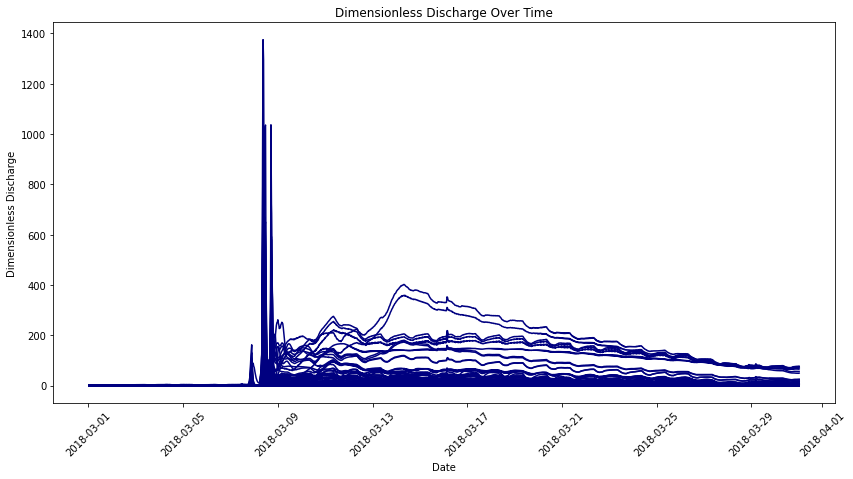

Percent over threshold:  76.81159420289855


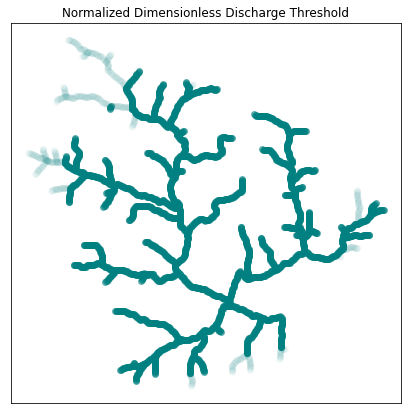

In [15]:
#makeDischsngeGraphs("data/20210413.matilija.dhsvm.discharge.flux.0-05h.csv")
makeDimensionlessDischargeGraphs("output05h.csv")


1 hour:

   segmentId  time  dimensionlessDischarge  overThreshold   threshold
0          1   1.0                0.000000              0  450.162586
1          2   1.0                0.000000              0   51.160831
2          3   1.0                0.000000              0  381.152321
3          4   1.0                0.056819              0   52.225016
4          5   1.0                0.130109              0   52.258619


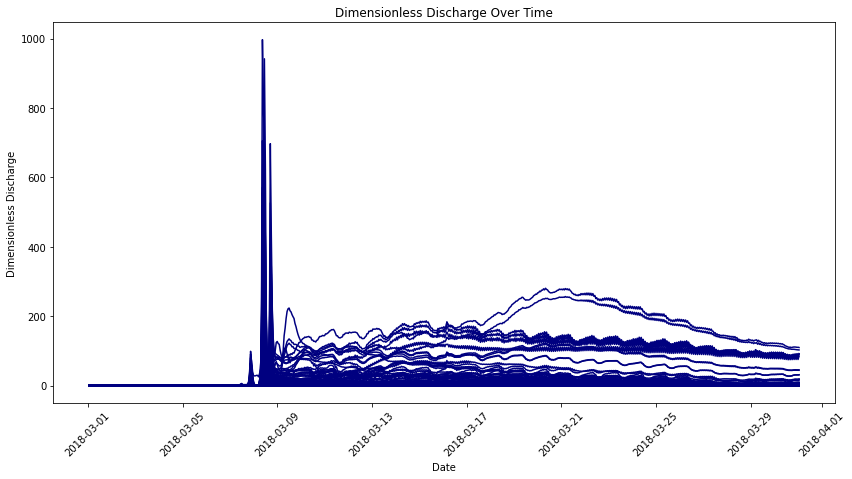

Percent over threshold:  68.84057971014492


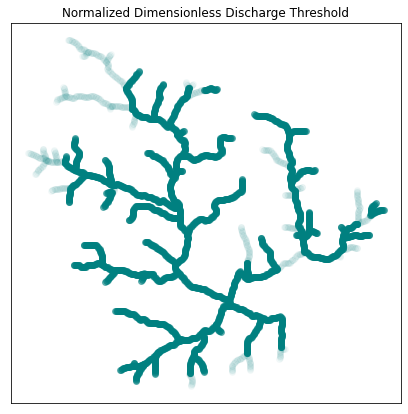

In [16]:
#makeDischsngeGraphs("data/20210413.matilija.dhsvm.discharge.flux.1h.csv")
makeDimensionlessDischargeGraphs("output1h.csv")

2 hour:

   segmentId  time  dimensionlessDischarge  overThreshold   threshold
0          1   2.0                0.000000              0  450.162586
1          2   2.0                0.000000              0   51.160831
2          3   2.0                0.000000              0  381.152321
3          4   2.0                0.077106              0   52.225016
4          5   2.0                0.129486              0   52.258619


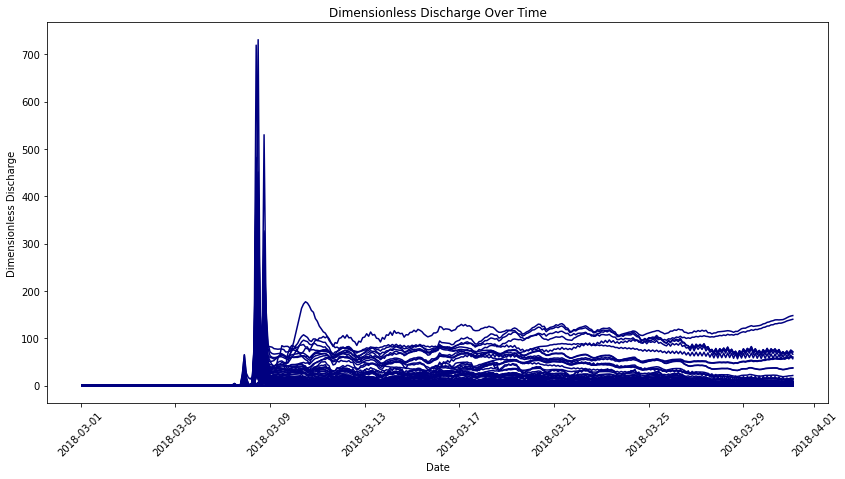

Percent over threshold:  63.76811594202898


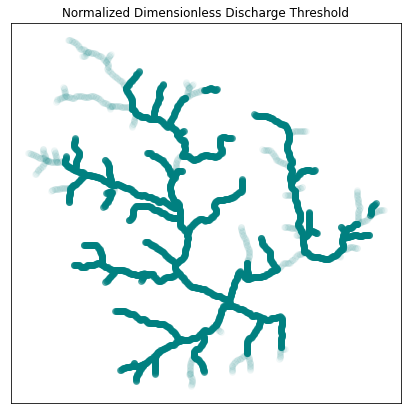

In [17]:
#makeDischsngeGraphs("data/20210413.matilija.dhsvm.discharge.flux.2h.csv")
makeDimensionlessDischargeGraphs("output2h.csv")

6 hour:

   segmentId  time  dimensionlessDischarge  overThreshold   threshold
0          1   6.0                0.000000              0  450.162586
1          2   6.0                0.000000              0   51.160831
2          3   6.0                0.000000              0  381.152321
3          4   6.0                0.049348              0   52.225016
4          5   6.0                0.142996              0   52.258619


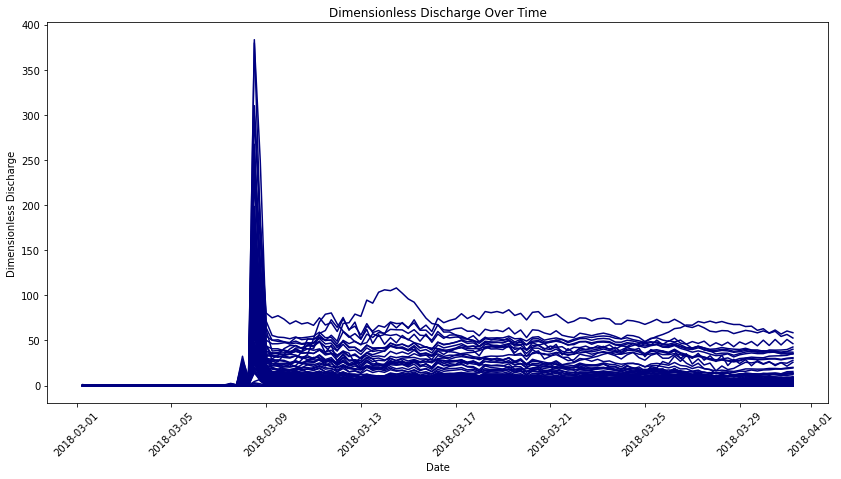

Percent over threshold:  47.82608695652174


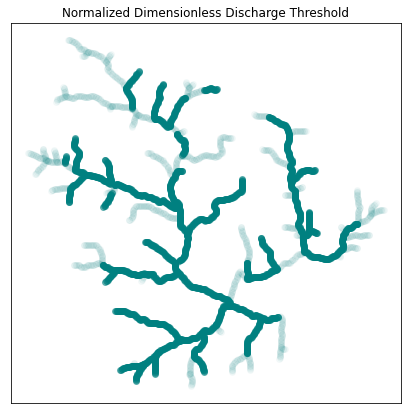

In [18]:
#makeDischsngeGraphs("data/20210413.matilija.dhsvm.discharge.flux.6h.csv")
makeDimensionlessDischargeGraphs("output6h.csv")

24 hour:

   segmentId  time  dimensionlessDischarge  overThreshold   threshold
0          1  24.0                0.000000              0  450.162586
1          2  24.0               -0.000000              0   51.160831
2          3  24.0               -0.000000              0  381.152321
3          4  24.0               -0.001772              0   52.225016
4          5  24.0               -0.003032              0   52.258619


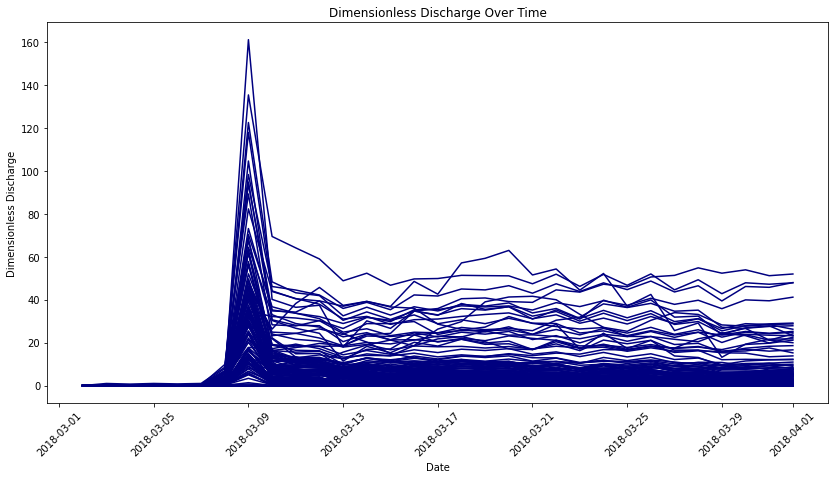

Percent over threshold:  9.420289855072465


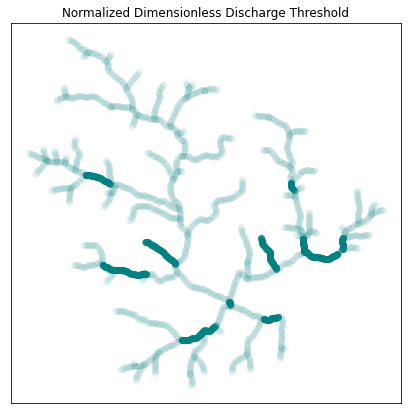

In [19]:
#makeDischsngeGraphs("data/20210413.matilija.dhsvm.discharge.flux.24h.csv")
makeDimensionlessDischargeGraphs("output24h.csv")

# Predicted Debris Flows vs Model

In [20]:
dfFlowLines = (pd.read_csv("data/MatilijaFlowLines_32610.csv"))
dfDebris = (pd.read_csv("data/MatilijaDebris_32610.csv"))

In [21]:
print(dfFlowLines.head())
print(dfDebris.head())

               X             Y
0  832855.038458  3.823905e+06
1  832866.951770  3.823905e+06
2  832880.174647  3.823908e+06
3  832896.864288  3.823912e+06
4  832917.325601  3.823910e+06
               X             Y
0  830713.421186  3.824939e+06
1  830723.488253  3.824933e+06
2  830747.543712  3.824927e+06
3  830765.124124  3.824926e+06
4  830781.919248  3.824927e+06


Change UTM to row/col values

In [22]:
extremeNorth = 3834402.59150284   # Coordinate for northern edge of grid
extremeWest = 823473.920058675   # Coordinate for western edge of grid
gridSpacing = 27                 # Grid resolution in m

flowLinesColVals = []
for x in dfFlowLines['X']:
    col = round((x-extremeWest)/gridSpacing)-3
    flowLinesColVals.append(col)
dfFlowLines['col'] = flowLinesColVals

debrisColVals = []
for x in dfDebris['X']:
    col = round((x-extremeWest)/gridSpacing)-3
    debrisColVals.append(col)
dfDebris['col'] =debrisColVals

flowLinesRowVals = []
for y in dfFlowLines['Y']:
    row = (507 - ((y-extremeNorth)/(-1*gridSpacing)))
    flowLinesRowVals.append(row)
dfFlowLines['row'] = flowLinesRowVals

debrisRowVals = []
for y in dfDebris['Y']:
    row = (507- ((y-extremeNorth)/(-1*gridSpacing)))
    debrisRowVals.append(row)
dfDebris['row'] =debrisRowVals


In [23]:
print(dfFlowLines.head())
print(dfDebris.head())
mapDf.head()

               X             Y  col         row
0  832855.038458  3.823905e+06  344  118.193993
1  832866.951770  3.823905e+06  345  118.208456
2  832880.174647  3.823908e+06  345  118.320682
3  832896.864288  3.823912e+06  346  118.468792
4  832917.325601  3.823910e+06  347  118.369793
               X             Y  col         row
0  830713.421186  3.824939e+06  265  156.482041
1  830723.488253  3.824933e+06  266  156.259957
2  830747.543712  3.824927e+06  266  156.041540
3  830765.124124  3.824926e+06  267  156.001670
4  830781.919248  3.824927e+06  268  156.038675


,col,row,segment,length.m,bank.height.m,channel.width.m
0,382,124,139,38.74103,0.01551,0.3
1,383,125,139,38.74103,0.01551,0.3
2,384,126,139,27.39491,0.01579,0.3
3,385,126,139,38.74103,0.01521,0.3
4,386,127,139,27.39491,0.01511,0.3


Stream map and predicted debris fow

In [24]:
def streamPlot(dfStream, dfDebris): 
    f, ax3 = plt.subplots(1, 1)
    cols =  dfStream['col']
    rows =  dfStream['row']
    colsDebris =  dfDebris['col']
    rowsDebris =  dfDebris['row']
    ax3.scatter(cols,rows, color = 'teal', s=9)
    ax3.scatter(colsDebris,rowsDebris, color = 'red', s=9, alpha = 0.3)
    ax3.set_title('Mapped Stream Flow')
    ax3.set_xticks([])
    ax3.set_yticks([])


    f.set_figheight(9)
    f.set_figwidth(9)

    plt.show()

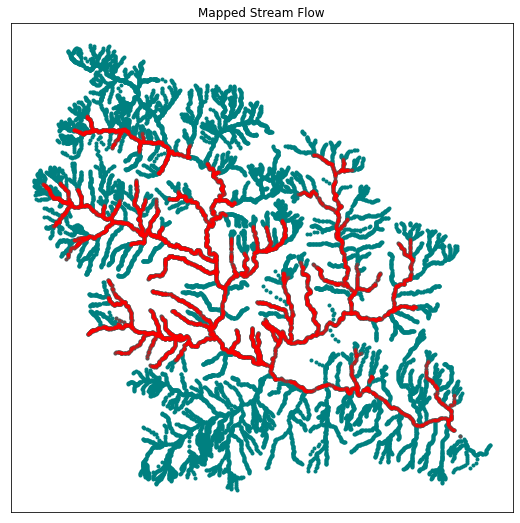

In [25]:
streamPlot(dfFlowLines, dfDebris)

Full stream vs. my area

In [26]:
def streamOnStreamPlot(dfStream, dfSub): 
    f, ax3 = plt.subplots(1, 1)
    cols =  dfStream['col']
    rows =  dfStream['row']
    colsSub =  dfSub['col']
    rowsSub =  dfSub['row']
    ax3.scatter(cols,rows, color = 'teal', s=9)
    ax3.scatter(colsSub,rowsSub, color = 'green', s=6, alpha = 0.3)
    ax3.set_title('Mapped Stream Flow')
    ax3.set_xticks([])
    ax3.set_yticks([])


    f.set_figheight(9)
    f.set_figwidth(9)

    plt.show()

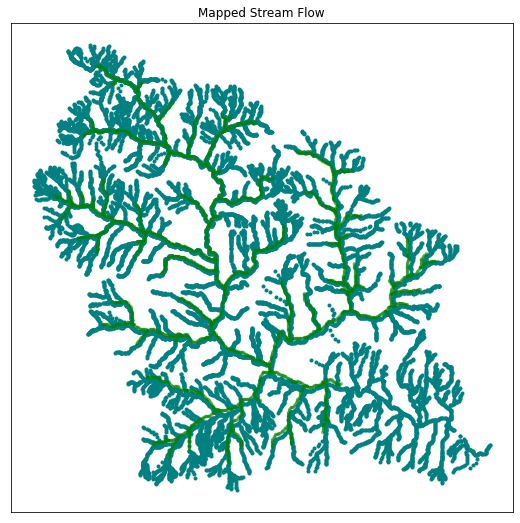

In [27]:
streamOnStreamPlot(dfFlowLines,mapDf)

In [28]:
print(mapDf)
print(dfFlowLines)

      col  row  segment  length.m  bank.height.m  channel.width.m
0     382  124      139  38.74103        0.01551              0.3
1     383  125      139  38.74103        0.01551              0.3
2     384  126      139  27.39491        0.01579              0.3
3     385  126      139  38.74103        0.01521              0.3
4     386  127      139  27.39491        0.01511              0.3
...   ...  ...      ...       ...            ...              ...
3610  107  464        1  38.74103        0.01324              0.7
3611  108  463        1  38.74103        0.01224              0.7
3612  109  462        1  27.39491        0.01195              0.7
3613  110  462        1  27.39491        0.01223              0.7
3614  111  462       83  27.39491        0.01223              0.2

[3615 rows x 6 columns]
                   X             Y  col         row
0      832855.038458  3.823905e+06  344  118.193993
1      832866.951770  3.823905e+06  345  118.208456
2      832880.174647  3.823

In [29]:
# reducing predited area to just what I am interested in
segmentsWithDebrisFLows = []
dfReduced = pd.DataFrame(columns=['X', 'Y', 'col', 'row'])

for segment in segments: 
    cols =  list(mapDf.loc[mapDf['segment'] == segment]['col'])
    rows =  list(mapDf.loc[mapDf['segment'] == segment]['row'])
    maxCol = max(cols)
    minCol = min(cols)
    maxRow = max(rows)
    minRow = min(rows)
    
    rslt_df = dfDebris.loc[(dfDebris['col'] >= minCol-5) &
                  (dfDebris['col'] <=maxCol+5) &
                  (dfDebris['row'] >=minCol-5) &
                  (dfDebris['row'] <=maxCol+5)]
    print("segemnt", segment, len(rslt_df))
    if len(rslt_df) > 0:
        segmentsWithDebrisFLows.append(segment)
    
    dfReduced = dfReduced.append(rslt_df)

segemnt 1 0
segemnt 2 0
segemnt 3 0
segemnt 4 173
segemnt 5 0
segemnt 6 39
segemnt 7 14
segemnt 8 0
segemnt 9 34
segemnt 10 0
segemnt 11 0
segemnt 12 0
segemnt 13 0
segemnt 14 0
segemnt 15 91
segemnt 16 0
segemnt 17 49
segemnt 18 388
segemnt 19 0
segemnt 20 0
segemnt 21 48
segemnt 22 0
segemnt 23 0
segemnt 24 112
segemnt 25 0
segemnt 26 0
segemnt 27 0
segemnt 28 47
segemnt 29 0
segemnt 30 369
segemnt 31 0
segemnt 32 0
segemnt 33 0
segemnt 34 0
segemnt 35 0
segemnt 36 0
segemnt 37 0
segemnt 38 0
segemnt 39 0
segemnt 40 0
segemnt 41 626
segemnt 42 0
segemnt 43 0
segemnt 44 0
segemnt 45 0
segemnt 46 0
segemnt 47 0
segemnt 48 14
segemnt 49 159
segemnt 50 0
segemnt 51 0
segemnt 52 0
segemnt 53 0
segemnt 54 13
segemnt 55 0
segemnt 56 11
segemnt 57 2
segemnt 58 918
segemnt 59 13
segemnt 60 0
segemnt 61 0
segemnt 62 47
segemnt 63 0
segemnt 64 162
segemnt 65 34
segemnt 66 0
segemnt 67 29
segemnt 68 0
segemnt 69 76
segemnt 70 10
segemnt 71 0
segemnt 72 0
segemnt 73 0
segemnt 74 14
segemnt 75 72


In [30]:
print(segmentsWithDebrisFLows)
print(len(segments))

[4, 6, 7, 9, 15, 17, 18, 21, 24, 28, 30, 41, 48, 49, 54, 56, 57, 58, 59, 62, 64, 65, 67, 69, 70, 74, 75, 76, 78, 79, 84, 86, 87, 90, 91, 94, 95, 97, 101, 105, 106, 108, 109, 111, 112, 113, 115, 117, 118, 119, 122, 124, 125, 126, 127, 128, 130, 131, 132, 133, 134, 135, 137, 138]
138


In [31]:
print(dfReduced.head())
print(len(dfReduced))
print(len(dfDebris))

                  X             Y  col         row
4089  827898.451118  3.825526e+06  161  178.255136
4090  827903.623413  3.825519e+06  161  177.981272
4091  827909.435918  3.825513e+06  161  177.768874
4092  827916.490520  3.825513e+06  162  177.745197
4093  827922.563731  3.825520e+06  162  178.004441
6952
6268


Plotting debris flows on top of pedicted area:

In [32]:
def thresholdPlot(dfDebris, dfTimeTest, title):
    segmentsWithDebrisFlows = []
    thresholdValues = {}
    totalOverThreshold = 0
    totalSegments = 0
    for segment in segments:
        #print(list(outputDf.loc[outputDf['segmentId'] == segment]['overThreshold']))
        if 1.0 in list(dfTimeTest.loc[dfTimeTest['segmentId'] == segment]['overThreshold']):
            thresholdValues[segment] = .5
            totalOverThreshold += 1 
        else:
            thresholdValues[segment] = .03
        totalSegments += 1
    print("Percent over threshold: ", (totalOverThreshold/totalSegments)*100)
    
    f, ax3 = plt.subplots(1, 1)
    ax3.scatter(dfDebris['col'],dfDebris['row'], color = 'teal', s=9)

    debrisFlowRowColList = []
    for segment in segments: 
        cols =  list(mapDf.loc[mapDf['segment'] == segment]['col'])
        rows =  list(mapDf.loc[mapDf['segment'] == segment]['row'])
        if thresholdValues[segment] > .3:
            debrisFlowRowColList.append([cols, rows])
            if not segment in segmentsWithDebrisFlows:
                segmentsWithDebrisFlows.append(segment)
        ax3.scatter(cols,rows, color = 'red', alpha=thresholdValues[segment], s = 7)
        ax3.set_title(title)
        ax3.set_xticks([])
        ax3.set_yticks([])

    f.set_figheight(7)
    f.set_figwidth(7)

    plt.show()
    
    numCorrect = 0
    totalChecked = 0
    for pair in debrisFlowRowColList:
        for i in range(len(pair[0])):
            totalChecked += 1
            rslt_df = dfDebris.loc[(dfDebris['col'] >= pair[0][i]-5) &
                  (dfDebris['col'] <=pair[0][i]+5) &
                  (dfDebris['row'] >=pair[1][i]-5) &
                  (dfDebris['row'] <=pair[1][i]+5)]

        if len(rslt_df) > 0:
            numCorrect += 1
    print("Predicted Corectly: ", (numCorrect/len(dfDebris))*100 ,"%")
    return(numCorrect, totalChecked, segmentsWithDebrisFlows)

1/2 hour:

Percent over threshold:  76.81159420289855


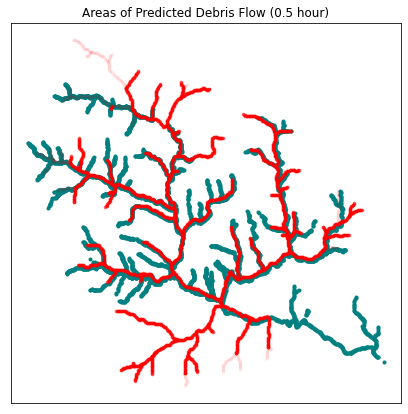

Predicted Corectly:  1.2603701340140394 %


In [33]:
outputDfFunc = pd.read_csv("output05h.csv")
output05h = thresholdPlot(dfDebris,outputDfFunc, "Areas of Predicted Debris Flow (0.5 hour)")


1 hour:

Percent over threshold:  68.84057971014492


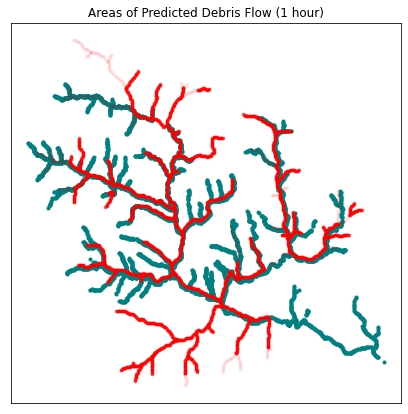

Predicted Corectly:  1.1327377153797065 %


In [34]:
outputDfFunc = pd.read_csv("output1h.csv")
output1h = thresholdPlot(dfDebris,outputDfFunc, "Areas of Predicted Debris Flow (1 hour)")


Percent over threshold:  63.76811594202898


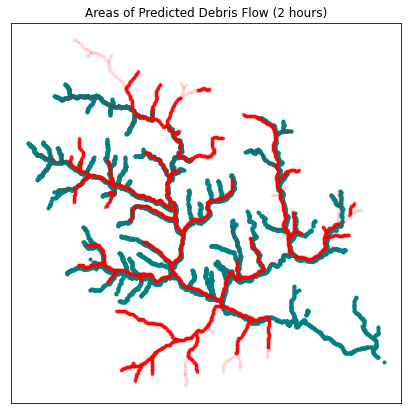

Predicted Corectly:  1.0848755583918315 %


In [35]:
outputDfFunc = pd.read_csv("output2h.csv")
output2h = thresholdPlot(dfDebris,outputDfFunc, "Areas of Predicted Debris Flow (2 hours)")


Percent over threshold:  47.82608695652174


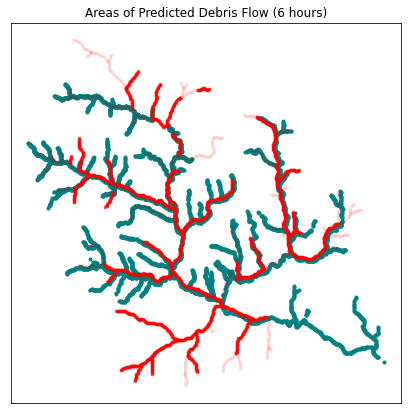

Predicted Corectly:  0.7817485641352904 %


In [36]:
outputDfFunc = pd.read_csv("output6h.csv")
output6h = thresholdPlot(dfDebris,outputDfFunc, "Areas of Predicted Debris Flow (6 hours)")


Percent over threshold:  9.420289855072465


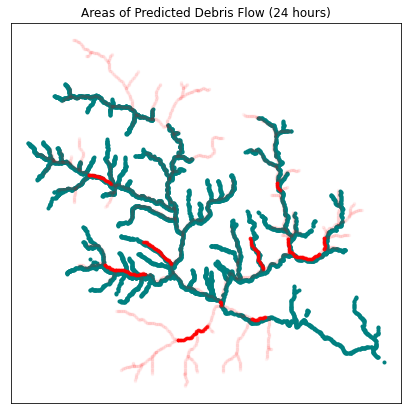

Predicted Corectly:  0.17549457562220802 %


In [37]:
outputDfFunc = pd.read_csv("output24h.csv")
output24h = thresholdPlot(dfDebris,outputDfFunc, "Areas of Predicted Debris Flow (24 hours)")


In [38]:
def findCorrectDebrisPredictions(predictedSegments):
    correct = 0
    for s in segmentsWithDebrisFLows:
        if s in predictedSegments:
            correct += 1
    return (correct/len(segmentsWithDebrisFLows))*100

In [39]:
correctFrom05h = findCorrectDebrisPredictions(output05h[2])

In [40]:
correctFrom1h = findCorrectDebrisPredictions(output1h[2])

In [41]:
correctFrom2h = findCorrectDebrisPredictions(output2h[2])

In [42]:
correctFrom6h = findCorrectDebrisPredictions(output6h[2])

In [43]:
correctFrom24h = findCorrectDebrisPredictions(output24h[2])

In [47]:
x = [.5,1,2,6,24]
y = [correctFrom05h, correctFrom1h, correctFrom2h, correctFrom6h, correctFrom24h]
print(y)

[90.625, 84.375, 79.6875, 62.5, 10.9375]


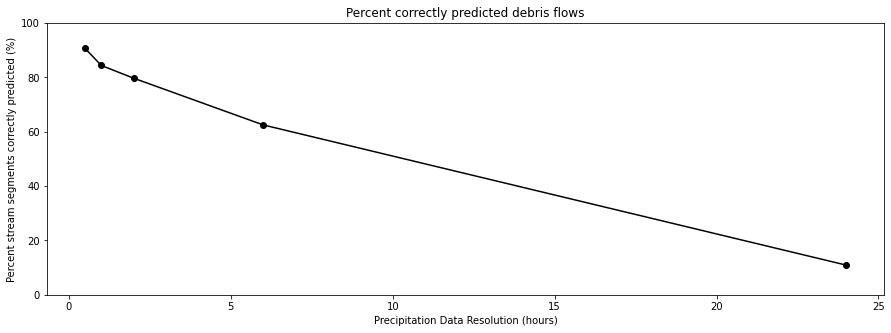

In [48]:
f, ax4 = plt.subplots(1, 1)
ax4.plot(x, y, '-o', color = "black")
ax4.set_title('Percent correctly predicted debris flows')
#labels = [item.get_text() for item in ax4.get_xticklabels()]
#labels[1] = '0.5'
#labels[3] = '1'
#labels[5] = '2'
#labels[7] = '6'
#labels[9] = '24'

#ax4.set_xticklabels(labels)
ax4.set_xlabel("Precipitation Data Resolution (hours)")
ax4.set_ylabel("Percent stream segments correctly predicted (%)")

f.set_figheight(5)
f.set_figwidth(15)
plt.ylim([0, 100])
plt.show()